# Making Trend Following Indicators through DSP

## Getting the data

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [159]:
data = pd.read_csv("bitcoin.csv", parse_dates = ["Date"])
data

,Date,Open,High,Low,Close,Volume
0,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
1,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
3,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
4,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...,...
36163,2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
36164,2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
36165,2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360
36166,2021-10-07 08:00:00,54755.91,54778.91,54400.00,54538.30,2049.382180


In [160]:
data = data[data['Date'].dt.hour == 0]

In [161]:
data = data.set_index("Date")

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2017-08-18 00:00:00 to 2021-10-07 00:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   float64
dtypes: float64(5)
memory usage: 70.8 KB


In [163]:
data = data[["Close"]].copy()

In [164]:
data

,Close
Date,
2017-08-18,4286.53
2017-08-19,4163.49
2017-08-20,4086.09
2017-08-21,4108.28
2017-08-22,3790.00
...,...
2021-10-03,47272.06
2021-10-04,47860.89
2021-10-05,49531.00


In [165]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [166]:
data

,Close,returns
Date,,
2017-08-18,4286.53,NaN
2017-08-19,4163.49,-0.029124
2017-08-20,4086.09,-0.018765
2017-08-21,4108.28,0.005416
2017-08-22,3790.00,-0.080638
...,...,...
2021-10-03,47272.06,-0.011477
2021-10-04,47860.89,0.012379
2021-10-05,49531.00,0.034300


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2017-08-18 00:00:00 to 2021-10-07 00:00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    1511 non-null   float64
 1   returns  1510 non-null   float64
dtypes: float64(2)
memory usage: 35.4 KB


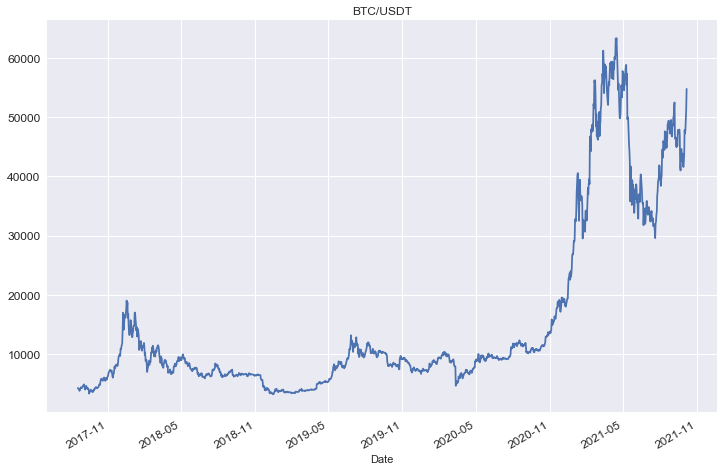

In [168]:
data.Close.plot(figsize = (12, 8), title = "BTC/USDT", fontsize = 12)
plt.show()

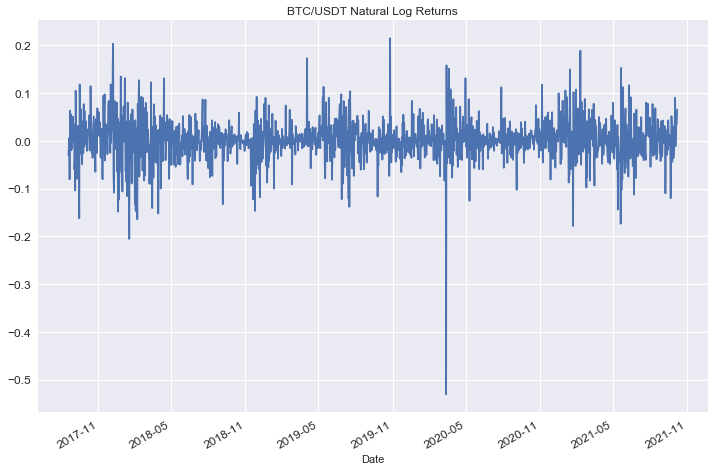

In [169]:
data.returns.plot(figsize = (12, 8), title = "BTC/USDT Natural Log Returns", fontsize = 12)
plt.show()

In [170]:
data.dropna(inplace=True)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-08-19 00:00:00 to 2021-10-07 00:00:00
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    1510 non-null   float64
 1   returns  1510 non-null   float64
dtypes: float64(2)
memory usage: 35.4 KB


In [172]:
from scipy import fftpack

In [173]:
# Compute the Fourier Transform of the returns
fourier_transform = fftpack.fft(data["returns"])

fourier_transform

array([2.54811921+0.j        , 0.72544756+1.73711954j,
       0.51229318+0.99764505j, ..., 0.32941181+3.04925471j,
       0.51229318-0.99764505j, 0.72544756-1.73711954j])

In [174]:
# Compute the frequency
sample_frequency = fftpack.fftfreq(len(fourier_transform))

In [175]:
# Keep only the positive frequency components
positive_frequency_indices = np.where(sample_frequency > 0)
positive_frequency = sample_frequency[positive_frequency_indices]
positive_transform = fourier_transform[positive_frequency_indices]

In [176]:
# # Compute the period axis
# period = 1/sample_frequency

In [177]:
# Compute the period axis
period = 1/positive_frequency

In [178]:
# # Compute the magnitude and phase of the frequency and period spectrum
# magnitude_frequency = np.abs(fourier_transform)
# phase_frequency = np.angle(fourier_transform, deg=True)
# magnitude_period = np.abs(fourier_transform)
# phase_period = np.angle(fourier_transform, deg=True)


In [179]:
# Compute the magnitude and phase of the frequency and period spectrum
magnitude_frequency = np.abs(fourier_transform[positive_frequency_indices])
phase_frequency = np.angle(fourier_transform[positive_frequency_indices], deg=True)
magnitude_period = np.abs(fourier_transform[positive_frequency_indices])
phase_period = np.angle(fourier_transform[positive_frequency_indices], deg=True)

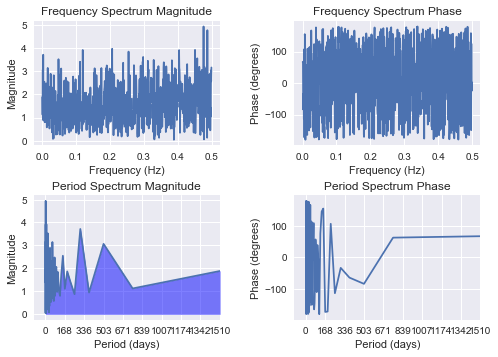

In [203]:
# Plot the frequency spectrum magnitude
plt.figure()
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # increase the height of the space between subplots
plt.subplot(221)
plt.plot(positive_frequency, magnitude_frequency)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Spectrum Magnitude")

# Plot the frequency spectrum phase
plt.subplot(222)
plt.plot(positive_frequency, phase_frequency)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")
plt.title("Frequency Spectrum Phase")

# Plot the period spectrum magnitude
plt.subplot(223)
plt.plot(period, magnitude_period)
plt.fill_between(period, magnitude_period, color='blue', alpha=0.5)
plt.xlabel("Period (days)")
plt.ylabel("Magnitude")
plt.title("Period Spectrum Magnitude")
plt.xlim(-100, 1510)
plt.xticks(np.linspace(0, 1510, 10))

# Plot the period spectrum phase
plt.subplot(224)
plt.plot(period, phase_period)
plt.xlabel("Period (days)")
plt.ylabel("Phase (degrees)")
plt.title("Period Spectrum Phase")
plt.xlim(-100, 1510)
plt.xticks(np.linspace(0, 1510, 10))

plt.show()

([<matplotlib.axis.XTick at 0x1b3386624e0>,
 <a list of 20 Text xticklabel objects>)

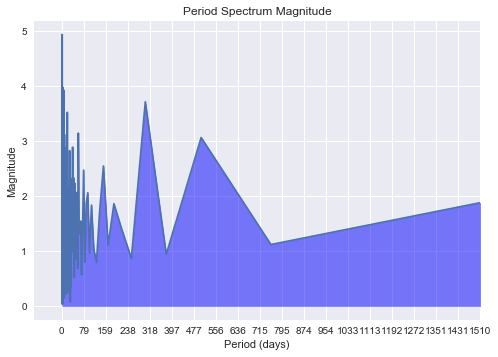

In [205]:
# Plot the period spectrum magnitude
plt.figure
plt.plot(period, magnitude_period)
plt.fill_between(period, magnitude_period, color='blue', alpha=0.5)
plt.xlabel("Period (days)")
plt.ylabel("Magnitude")
plt.title("Period Spectrum Magnitude")
plt.xlim(-100, 1510)
plt.xticks(np.linspace(0, 1510, 20))

## Moving Average(N=10)

In [184]:
from scipy.signal import lfilter, freqz

c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


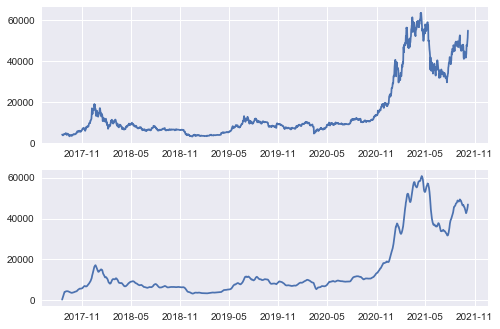

In [185]:
# Create the filter coefficients
coefficients = np.ones(10) / 10

# Apply the filter to the data
data["MA_10"] = lfilter(coefficients, 1, data["Close"])

# Plot the original data and the filtered data
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1)
axs[0].plot(data["Close"])
axs[1].plot(data["MA_10"])
plt.show()

c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide


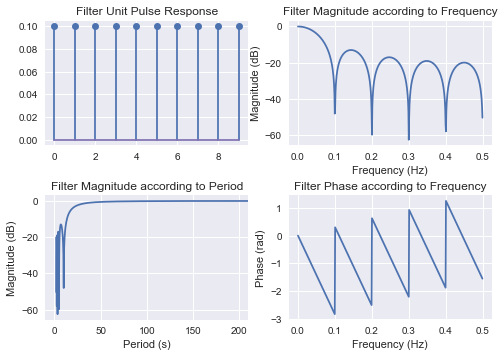

In [198]:
# Create the filter coefficients
coefficients = np.ones(10) / 10

# Compute the frequency response
w, h = freqz(coefficients)

# Convert the frequency axis to Hz
fs = 1
w = w * fs / (2 * np.pi)

# Plot the filter unit pulse response
plt.figure()
plt.subplots_adjust(hspace=0.4)  # increase the height of the space between subplots
plt.subplot(221)
plt.stem(coefficients)
plt.title("Filter Unit Pulse Response")

# Plot the filter magnitude and phase according to frequency
plt.subplot(222)
plt.plot(w, 20*np.log10(abs(h)))
plt.title("Filter Magnitude according to Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Plot the filter magnitude according to period
plt.subplot(223)
plt.plot(1/w, 20*np.log10(abs(h)))
plt.title("Filter Magnitude according to Period")
plt.xlabel("Period (s)")
plt.ylabel("Magnitude (dB)")
plt.xlim(-10, 210)


plt.subplot(224)
plt.plot(w, np.angle(h))
plt.title("Filter Phase according to Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")

plt.show()

## Moving Average(N=200)

c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


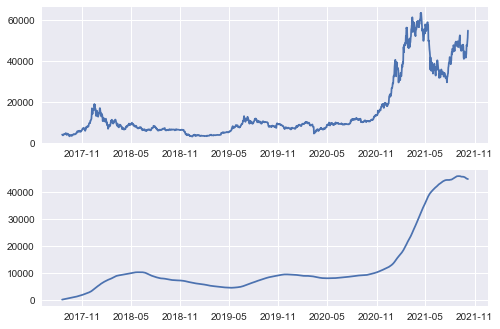

In [206]:
# Create the filter coefficients
coefficients = np.ones(200) / 200

# Apply the filter to the data
data["MA_200"] = lfilter(coefficients, 1, data["Close"])

# Plot the original data and the filtered data
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1)
axs[0].plot(data["Close"])
axs[1].plot(data["MA_200"])
plt.show()

c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)
c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log10
c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
c:\Users\minbh\miniconda3\envs\myenv3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


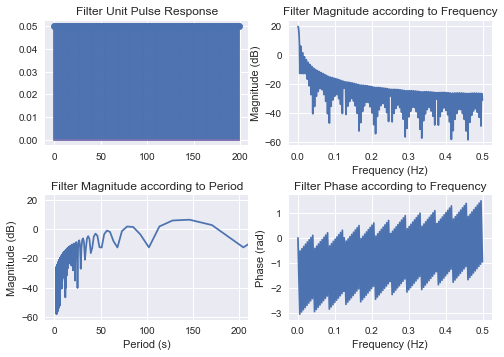

In [207]:
# Create the filter coefficients
coefficients = np.ones(200) / 20

# Compute the frequency response
w, h = freqz(coefficients)

# Convert the frequency axis to Hz
fs = 1
w = w * fs / (2 * np.pi)

# Plot the filter unit pulse response
plt.figure()
plt.subplots_adjust(hspace=0.4)  # increase the height of the space between subplots
plt.subplot(221)
plt.stem(coefficients)
plt.title("Filter Unit Pulse Response")

# Plot the filter magnitude and phase according to frequency
plt.subplot(222)
plt.plot(w, 20*np.log10(abs(h)))
plt.title("Filter Magnitude according to Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Plot the filter magnitude according to period
plt.subplot(223)
plt.plot(1/w, 20*np.log10(abs(h)))
plt.title("Filter Magnitude according to Period")
plt.xlabel("Period (s)")
plt.ylabel("Magnitude (dB)")
plt.xlim(-10, 210)


plt.subplot(224)
plt.plot(w, np.angle(h))
plt.title("Filter Phase according to Frequency")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (rad)")

plt.show()